<a href="https://colab.research.google.com/github/MazurovaNN/theory_ver/blob/main/DZ9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):

 zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная).

 Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Проанализирую присутствие зависимости с помощью графика

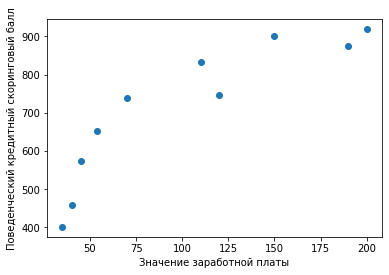

In [3]:
plt.scatter(zp,ks)
plt.xlabel('Значение заработной платы')
plt.ylabel('Поведенческий кредитный скоринговый балл', rotation=90)
plt.show()

Проанализировав график, можно констатировать, что наблюдается линейная зависимость (позитивная)

In [4]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [5]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

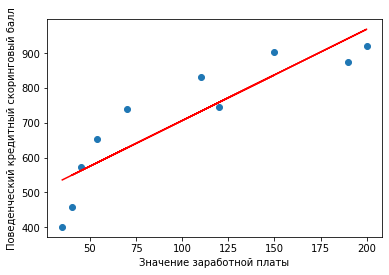

In [6]:
plt.scatter(zp,ks)
plt.plot(zp, a+b*zp, c='r')
plt.xlabel('Значение заработной платы')
plt.ylabel('Поведенческий кредитный скоринговый балл', rotation=90)
plt.show()

ВЫВОД: 

Полученная функция демонстрирует линейную зависимость между значением заработной платы и кредитного скорингового балла.

Задача 2 

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [7]:
def _mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

Рассчитываю значение для вычесленного коэффициента b=2.62

In [8]:
_mse(2.62, zp, ks)

203812.48504

Далее следует подобрать значение коэффициента b
 , при котором MSE стремится к 0
 , используя свойства производной. Для этого вычислю производную нашей функции потерь:

In [9]:
def _mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

In [10]:
alpha=1e-06
b=0.1
mse_min=_mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*_mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут мин.')
        break
    else:
        mse_min=_mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут мин.


In [11]:
b_min

5.889820285147628

Задача 3 (Дополнительно) 

Произвести вычисления как в пункте 2, но с вычислением intercept.

Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

Рассчет функции потерь

In [12]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

Частная производная функции потерь по a

In [13]:
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

Частная производная функции потерь по b

In [14]:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [15]:
alpha=3e-05
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут мин.')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
Итерация #50000, a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
Итерация #100000, a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
Итерация #150000, a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
Итерация #200000, a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
Итерация #250000, a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
Итерация #300000, a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
Итерация #350000, a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
Итерация #400000, a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
Итерация #450000, a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
Итерация #500000, a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
Итерация #550000, a=444.07456447602823, b=2.6212954716991606, mse=6470.41688149387
Итерация #

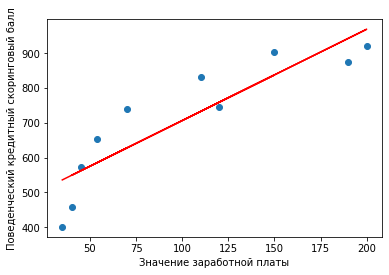

In [16]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r')
plt.xlabel('Значение заработной платы')
plt.ylabel('Поведенческий кредитный скоринговый балл', rotation=90)
plt.show()